reference: https://colab.research.google.com/drive/1_Y94r57i-A_TPXpgp7sgn2m4Mu2hlWE4#scrollTo=9WlSAs9NfqTE 

In [1]:
import SimpleITK as sitk 
import matplotlib
import gui
import os
import registration_gui as rgui
import utilities

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
# chest image path
chest_dpath = r'data\chestctdata'
chest_fixed_path = r'data\chestctdata\01_Fixed.mhd'
chest_moving_path = r'data\chestctdata\01_Moving.mhd'



In [3]:
# lung image path 
lung_dpath = r'data\lungMasks'
lung_fixed_path = r'data\lungMasks\01_Fixed.mhd'
lung_moving_path = r'data\lungMasks\01_Moving.mhd'

### Image preprocessing

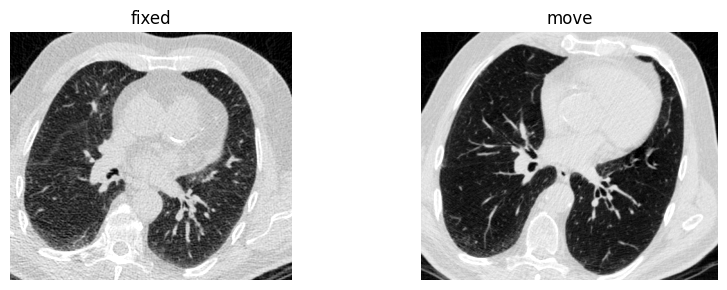

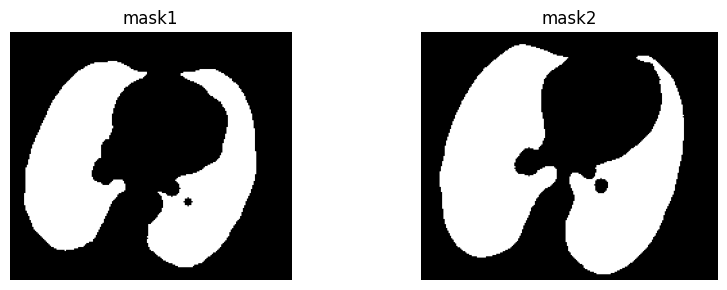

In [18]:
# Display chest images
chest_fixed = sitk.ReadImage(chest_fixed_path)
chest_moving = sitk.ReadImage(chest_moving_path)

# display lung masks 
lung_fixed = sitk.ReadImage(lung_fixed_path)
lung_moving = sitk.ReadImage(lung_moving_path)

# display images
gui.MultiImageDisplay(image_list=[chest_fixed,chest_moving],
                      title_list=['fixed','move'],
                      figure_size=(9,3))

gui.MultiImageDisplay(image_list=[lung_fixed,lung_moving],
                      title_list=['mask1','mask2'],
                      figure_size=(9,3))



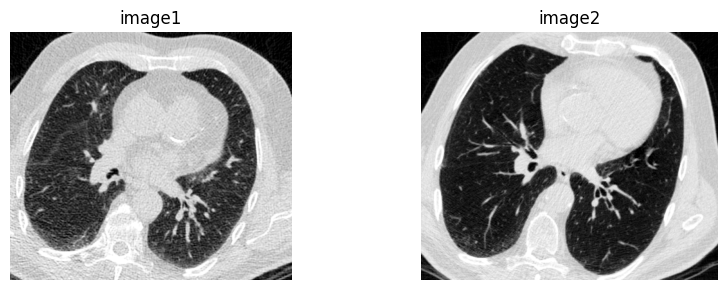

In [19]:
# prepare data for processing 

# for chest fixed image the intensity is : −1020 – 385
fixed_255 = sitk.Cast(sitk.IntensityWindowing(chest_fixed, windowMinimum=-1020, windowMaximum=385,
                        outputMinimum=0.0, outputMaximum=255.0), sitk.sitkUInt8)

# for chest moving image the intensity is : −1006 – 300
moving_255 = sitk.Cast(sitk.IntensityWindowing(chest_moving, windowMinimum=-1006, windowMaximum=300,
                                             outputMinimum=0.0, outputMaximum=255.0), sitk.sitkUInt8)

gui.MultiImageDisplay(image_list = [fixed_255, moving_255],
                      title_list = ['image1', 'image2'],
                      figure_size=(9,3))

### Image Registration 

In [7]:
# BSpline based FFD

### Overlay Images